In [1]:
import pandas as pd
from numpy import nan
import math
import numpy as np

In [2]:
data = pd.read_csv('vehicle_level_full_data.csv',index_col=0)

C:\MyArcGISPro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (65,66,112,113) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#### read a excel file that contain feature name and unavailable code number
features = pd.read_excel('Features_missing.xlsx')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91674 entries, 0 to 91673
Columns: 170 entries, CASENUM to MVISOBSC
dtypes: float64(107), int64(57), object(6)
memory usage: 119.6+ MB


In [5]:
imputed_col = data.columns[data.columns.str.contains(pat = '_IM') ]

In [6]:
imputed_col

Index(['WKDY_IM', 'HOUR_IM', 'MINUTE_IM', 'EVENT1_IM', 'MANCOL_IM',
       'RELJCT1_IM', 'RELJCT2_IM', 'LGTCON_IM', 'WEATHR_IM', 'MAXSEV_IM',
       'NO_INJ_IM', 'ALCHL_IM', 'HITRUN_IM', 'BDYTYP_IM', 'MDLYR_IM',
       'IMPACT1_IM', 'VEVENT_IM', 'PCRASH1_IM', 'MXVSEV_IM', 'NUMINJ_IM',
       'V_ALCH_IM'],
      dtype='object')

In [8]:
# list of repeated columns
repeated_col = ['DAY_WEEK', 'HOUR', 'MINUTE', 'HARM_EV', 'MAN_COLL', 'RELJCT1',
               'RELJCT2', 'LGT_COND', 'MAX_SEV', 'NUM_INJ','ALCOHOL','HIT_RUN',
               'BODY_TYP', 'MOD_YEAR', 'IMPACT1', 'M_HARM', 'P_CRASH1', 'MAX_VSEV',
               'NUM_INJV', 'VEH_ALCH']

# drop the repeated columns
data = data.drop(repeated_col, axis=1)

# drop the repeated features 
for x in repeated_col:
    features = features[features['Feature'] != x]


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91674 entries, 0 to 91673
Columns: 150 entries, CASENUM to MVISOBSC
dtypes: float64(98), int64(46), object(6)
memory usage: 105.6+ MB


In [10]:
#### slicing the data that only contain not reported data code
Not_reported = features[features['Not_reported'].notnull()].reset_index(drop=True)
Not_reported = Not_reported.loc[:,['Feature','Not_reported']]

#### slicing the data that only contain Unknown data code
Unknown = features[features['Unknown'].notnull()].reset_index(drop=True)
Unknown = Unknown.loc[:,['Feature','Unknown']]

#### slicing the data that only contain none data code
none = features[features['None'].notnull()].reset_index(drop=True)
none = none.loc[:,['Feature','None']]

#### slicing the data that only contain Not_Applicable data code
Not_Applicable = features[features['Not_Applicable'].notnull()].reset_index(drop=True)
Not_Applicable = Not_Applicable.loc[:,['Feature','Not_Applicable']]

In [11]:
Not_reported.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
Feature         93 non-null object
Not_reported    93 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [12]:
Unknown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 2 columns):
Feature    142 non-null object
Unknown    142 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [13]:
Unknown

,Feature,Unknown
0,TYP_INT,9.900000e+01
1,WRK_ZONE,4.000000e+00
2,REL_ROAD,9.900000e+01
3,WEATHER1,9.900000e+01
4,WEATHER2,9.900000e+01
5,WEATHER,9.900000e+01
6,INT_HWY,9.000000e+00
7,CF1,9.900000e+01
8,CF2,9.900000e+01
9,CF3,9.900000e+01


In [14]:
none.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Feature    30 non-null object
None       30 non-null object
dtypes: object(2)
memory usage: 560.0+ bytes


In [15]:
Not_Applicable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
Feature           37 non-null object
Not_Applicable    37 non-null float64
dtypes: float64(1), object(1)
memory usage: 672.0+ bytes


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91674 entries, 0 to 91673
Columns: 150 entries, CASENUM to MVISOBSC
dtypes: float64(98), int64(46), object(6)
memory usage: 105.6+ MB


In [18]:
def data_imputed(df):

    for x in range(df.shape[0]):
        feature = df.iloc[x,0]
        imputed_value = df.iloc[x,1]
        if feature in data.columns:
            data[feature] = data[feature].replace(imputed_value, np.nan)

    return data

data = data_imputed(Not_reported)
data = data_imputed(Unknown)
data = data_imputed(none)
data = data_imputed(Not_Applicable)

 

In [49]:
## MXVSEV_IM(maximum injury sustained in the vehicle)
## DEFORMED(amount of damage sustained by this vehicle(indicate by police))
## MAXSEV_IM(maximum injury of all person)

In [21]:
# drop the columns that have too many missing values
# threshold = 0.5

frac = len(data) * 0.8
data_dropped = data.dropna(thresh=frac, axis = 1)
data_dropped = data_dropped.drop('MDAREAS', axis = 1)
data_dropped['MXVSEV_IM'] = data['MXVSEV_IM']
data_dropped['DEFORMED'] = data['DEFORMED']
data_dropped['MAXSEV_IM'] = data['MAXSEV_IM']

data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91674 entries, 0 to 91673
Data columns (total 89 columns):
CASENUM       91674 non-null int64
REGION        91674 non-null int64
PSU           91674 non-null int64
PJ            91674 non-null int64
PSU_VAR       91674 non-null int64
URBANICITY    91674 non-null int64
STRATUM       91674 non-null int64
VE_TOTAL      91674 non-null int64
VE_FORMS      91674 non-null int64
PVH_INVL      91674 non-null int64
PEDS          91674 non-null int64
PERMVIT       91674 non-null int64
PERNOTMVIT    91674 non-null int64
MONTH         91674 non-null int64
YEAR          91674 non-null int64
TYP_INT       80685 non-null float64
REL_ROAD      91605 non-null float64
WEATHER1      86745 non-null float64
WEATHER2      91668 non-null float64
WEATHER       86745 non-null float64
SCH_BUS       91674 non-null int64
INT_HWY       91666 non-null float64
WKDY_IM       91674 non-null int64
HOUR_IM       91674 non-null int64
MINUTE_IM     91674 non-null int64
EVEN

In [22]:
data_dropped

,CASENUM,REGION,PSU,PJ,PSU_VAR,URBANICITY,STRATUM,VE_TOTAL,VE_FORMS,PVH_INVL,...,HITRUN_IM,BDYTYP_IM,MDLYR_IM,IMPACT1_IM,VEVENT_IM,PCRASH1_IM,MXVSEV_IM,NUMINJ_IM,V_ALCH_IM,DEFORMED
0,201800381338,4,56,208,208,1,9,4,4,0,...,0.0,4.0,2015.0,12.0,12.0,1.0,0.0,0.0,2.0,4.0
1,201800381338,4,56,208,208,1,9,4,4,0,...,0.0,14.0,2010.0,6.0,12.0,2.0,0.0,0.0,2.0,4.0
2,201800381338,4,56,208,208,1,9,4,4,0,...,0.0,14.0,2007.0,6.0,12.0,5.0,0.0,0.0,2.0,2.0
3,201800381338,4,56,208,208,1,9,4,4,0,...,0.0,9.0,2007.0,6.0,12.0,5.0,0.0,0.0,2.0,2.0
4,201800381366,4,56,214,214,1,7,3,3,0,...,0.0,9.0,2007.0,12.0,12.0,1.0,1.0,1.0,2.0,6.0
5,201800381366,4,56,214,214,1,7,3,3,0,...,0.0,9.0,2016.0,6.0,12.0,1.0,0.0,0.0,2.0,6.0
6,201800381366,4,56,214,214,1,7,3,3,0,...,0.0,66.0,1999.0,6.0,12.0,1.0,0.0,0.0,2.0,2.0
7,201800381374,4,56,214,214,1,6,2,2,0,...,0.0,34.0,2005.0,83.0,12.0,1.0,1.0,1.0,2.0,4.0
8,201800381374,4,56,214,214,1,6,2,2,0,...,0.0,5.0,2017.0,61.0,12.0,1.0,1.0,1.0,2.0,6.0
9,201800383118,4,56,209,209,1,10,2,2,0,...,0.0,9.0,2009.0,12.0,12.0,1.0,0.0,0.0,2.0,2.0


In [23]:
# check the unqiue number of NA in dataframe on rows
data_dropped.isnull().sum(axis=1).unique()

array([ 2,  3,  4,  6,  1,  5,  0, 13, 14, 10, 16,  7,  8,  9, 11, 15, 19,
       12, 18, 20, 21, 22, 17], dtype=int64)

In [24]:
# drop the observations that have missing values
data_dropped = data_dropped.dropna().reset_index(drop= True)

In [25]:
data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41073 entries, 0 to 41072
Data columns (total 89 columns):
CASENUM       41073 non-null int64
REGION        41073 non-null int64
PSU           41073 non-null int64
PJ            41073 non-null int64
PSU_VAR       41073 non-null int64
URBANICITY    41073 non-null int64
STRATUM       41073 non-null int64
VE_TOTAL      41073 non-null int64
VE_FORMS      41073 non-null int64
PVH_INVL      41073 non-null int64
PEDS          41073 non-null int64
PERMVIT       41073 non-null int64
PERNOTMVIT    41073 non-null int64
MONTH         41073 non-null int64
YEAR          41073 non-null int64
TYP_INT       41073 non-null float64
REL_ROAD      41073 non-null float64
WEATHER1      41073 non-null float64
WEATHER2      41073 non-null float64
WEATHER       41073 non-null float64
SCH_BUS       41073 non-null int64
INT_HWY       41073 non-null float64
WKDY_IM       41073 non-null int64
HOUR_IM       41073 non-null int64
MINUTE_IM     41073 non-null int64
EVEN

In [26]:
#data_dropped.to_csv('data_dropped_0.5.csv')

In [27]:
data_dropped.head()

,CASENUM,REGION,PSU,PJ,PSU_VAR,URBANICITY,STRATUM,VE_TOTAL,VE_FORMS,PVH_INVL,...,HITRUN_IM,BDYTYP_IM,MDLYR_IM,IMPACT1_IM,VEVENT_IM,PCRASH1_IM,MXVSEV_IM,NUMINJ_IM,V_ALCH_IM,DEFORMED
0,201800384395,3,48,85,48,1,10,1,1,0,...,0.0,4.0,2010.0,12.0,30.0,14.0,0.0,0.0,2.0,6.0
1,201800384410,3,48,91,48,1,10,2,2,0,...,0.0,14.0,2009.0,6.0,12.0,5.0,0.0,0.0,2.0,2.0
2,201800384410,3,48,91,48,1,10,2,2,0,...,0.0,4.0,2000.0,12.0,12.0,1.0,0.0,0.0,2.0,2.0
3,201800384413,3,48,91,48,1,8,2,2,0,...,0.0,34.0,2008.0,6.0,12.0,5.0,0.0,0.0,2.0,2.0
4,201800384413,3,48,91,48,1,8,2,2,0,...,0.0,5.0,2012.0,12.0,12.0,1.0,2.0,1.0,2.0,6.0


In [28]:
################# function to get the item list of a column which does not include nan
def items (df, c):
    vals = df[c].unique().tolist()
    # if it's numerical (numbers)
    if np.issubdtype(df[c].dtype, np.number) == True:
        vals = [x for x in vals if not math.isnan(x)]
        vals.sort()
        return vals
    else:
    # if it's str
        vals = [x for x in vals if x != np.nan]
        return vals

In [29]:
def inputnumerical ():
    lst = [] 
    lst = [x for x in input("Enter columns that don't need to encode (eg: AAA, BBB): ").split()] 
    return lst

In [30]:
################## encoding 
def encoding (df):
    current_progress = 0

    
    # ask user which (numerical) columns should be skipped in this process
    num_cols = inputnumerical()
    print('the number of column that dont need to encoded is', len(num_cols))
    # iterate columns
    for column in df:

        ## print progress
        current_progress = current_progress+1
        column_len = len(df.columns)
        if current_progress % 1 == 0:
            progress = current_progress/column_len *100
            #print('current column is', current_progress)
            print("progress is {}% complete.".format(round(progress,2)))        
    
    
        # check if the column is numerical
        if column in num_cols:
            continue
        # encoding
        else: 
            # get the length of the list of unique values
            unique = items(df, column)
            len_unique = len(unique)
            # make a new list contains 1,2,3,4,5...
            codes = list(range(0, len_unique))
            
            # using for loop to replace the value
            for i in range(0,len_unique):
                df[column].replace(to_replace = unique[i], value = codes[i], inplace = True)
                
 
    return df

In [31]:
######## columns that don't need to encode:
#CASENUM PJ STARATUM PSUSTRAT VEH_NO PER_NO STR_VEH MAKE MAK_MOD MODEL DR_ZIP VIN MCARR_I2 MCARR_ID TRLR1VIN TRLR2VIN TRLR3VIN PMODEL PMAK_MOD PVIN PMCARR_I1 PMCARR_I2 PMCARR_ID PHAZ_ID PTRLR1VIN PTRLR2VIN PTRLR3VIN HAZ_ID VE_TOTAL VE_FORMS PVH_INVL PERMVIT PERNOTMVIT NUM_INJ NUMINJ_IM WEIGHT AGE AGE_IM PBAGE NUMOCCS TRAV_SP MONTH YEAR DAY_WEEK HOUR MINUTE MOD_YEAR PMODYEAR PMONTH PHOUR PMINUTE


In [33]:
df = encoding(data_dropped)

Enter columns that don't need to encode (eg: AAA, BBB): CASENUM PJ STARATUM PSUSTRAT VEH_NO PER_NO STR_VEH MAKE MAK_MOD MODEL DR_ZIP VIN MCARR_I2 MCARR_ID TRLR1VIN TRLR2VIN TRLR3VIN PMODEL PMAK_MOD PVIN PMCARR_I1 PMCARR_I2 PMCARR_ID PHAZ_ID PTRLR1VIN PTRLR2VIN PTRLR3VIN HAZ_ID VE_TOTAL VE_FORMS PVH_INVL PERMVIT PERNOTMVIT NUM_INJ NUMINJ_IM WEIGHT AGE AGE_IM PBAGE NUMOCCS TRAV_SP MONTH YEAR DAY_WEEK HOUR MINUTE MOD_YEAR PMODYEAR PMONTH PHOUR PMINUTE
the number of column that dont need to encoded is 51
progress is 1.12% complete.
progress is 2.25% complete.
progress is 3.37% complete.
progress is 4.49% complete.
progress is 5.62% complete.
progress is 6.74% complete.
progress is 7.87% complete.
progress is 8.99% complete.
progress is 10.11% complete.
progress is 11.24% complete.
progress is 12.36% complete.
progress is 13.48% complete.
progress is 14.61% complete.
progress is 15.73% complete.
progress is 16.85% complete.
progress is 17.98% complete.
progress is 19.1% complete.
progress i

In [34]:
df.head()

,CASENUM,REGION,PSU,PJ,PSU_VAR,URBANICITY,STRATUM,VE_TOTAL,VE_FORMS,PVH_INVL,...,HITRUN_IM,BDYTYP_IM,MDLYR_IM,IMPACT1_IM,VEVENT_IM,PCRASH1_IM,MXVSEV_IM,NUMINJ_IM,V_ALCH_IM,DEFORMED
0,201800384395,2,27,85,27,0,8,1,1,0,...,0.0,3.0,48.0,12.0,23.0,13.0,0.0,0.0,1.0,3.0
1,201800384410,2,27,91,27,0,8,2,2,0,...,0.0,10.0,47.0,6.0,10.0,4.0,0.0,0.0,1.0,1.0
2,201800384410,2,27,91,27,0,8,2,2,0,...,0.0,3.0,38.0,12.0,10.0,0.0,0.0,0.0,1.0,1.0
3,201800384413,2,27,91,27,0,6,2,2,0,...,0.0,19.0,46.0,6.0,10.0,4.0,0.0,0.0,1.0,1.0
4,201800384413,2,27,91,27,0,6,2,2,0,...,0.0,4.0,50.0,12.0,10.0,0.0,2.0,1.0,1.0,3.0


In [35]:
df.to_csv('data_encoded1.csv')

In [63]:
 from sklearn.metrics import confusion_matrix

In [36]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [38]:
df= pd.read_csv('data_encoded1.csv')

C:\MyArcGISPro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
########
## 'MXVSEV_IM' is dependent variable

y1 = df['MXVSEV_IM']
# get object list
object_list = list(df.select_dtypes(include=['object']).columns)

x1 = df.drop(['CASENUM','MXVSEV_IM','DEFORMED','MAXSEV_IM','NUMINJ_IM'],axis = 1)
x1 = x1.drop(object_list, axis=1)

In [42]:
########
## ''DEFORMED'' is dependent variable

y2 = df['DEFORMED']
# get object list
object_list = list(df.select_dtypes(include=['object']).columns)

x2 = df.drop(['CASENUM','MXVSEV_IM','DEFORMED','MAXSEV_IM','NUMINJ_IM'],axis = 1)
x2 = x2.drop(object_list, axis=1)

In [43]:
########
## 'MXVSEV_IM' is dependent variable

y3 = df['MAXSEV_IM']
# get object list
object_list = list(df.select_dtypes(include=['object']).columns)

x3 = df.drop(['CASENUM','MXVSEV_IM','DEFORMED','MAXSEV_IM','NUMINJ_IM'],axis = 1)
x3 = x3.drop(object_list, axis=1)

In [44]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, 
                                        test_size=0.3, random_state=42)
dt_basic = DecisionTreeClassifier()
dt_basic.fit(x1_train, y1_train)
y1_predict = dt_basic.predict(x1_test)
print('DT:',accuracy_score(y1_test, y1_predict))

DT: 0.8064437591300113


In [65]:
print(confusion_matrix(y1_test, y1_predict))

[[7964  226   49   62    0    0]
 [ 264 1371  220   68    3    0]
 [ 140  420  469  110    4    0]
 [  46   25   56  689    5    0]
 [   5    5   16   63   41    0]
 [   1    0    0    0    0    0]]


In [66]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y1_test, y1_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      8301
         1.0       0.67      0.71      0.69      1926
         2.0       0.58      0.41      0.48      1143
         3.0       0.69      0.84      0.76       821
         4.0       0.77      0.32      0.45       130
         5.0       0.00      0.00      0.00         1

    accuracy                           0.85     12322
   macro avg       0.61      0.54      0.56     12322
weighted avg       0.85      0.85      0.85     12322



C:\MyArcGISPro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
rf_basic = RandomForestClassifier()
rf_basic.fit(x1_train, y1_train)
rf_predict = rf_basic.predict(x1_test)
print('RF:',accuracy_score(y1_test, y1_predict))

RF: 0.8064437591300113


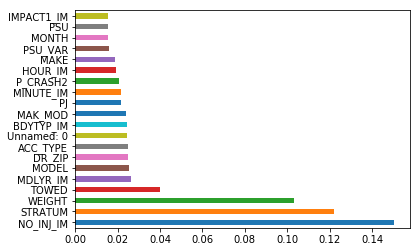

In [46]:
feat_importances = pd.Series(rf_basic.feature_importances_, index=x1.columns)
feat_importances.nlargest(20).plot(kind='barh')
pyplot.show()

In [47]:
knn_basic = KNeighborsClassifier()
knn_basic.fit(x1_train, y1_train)
y1_predict = knn_basic.predict(x1_test)
print('KNN:',accuracy_score(y1_test, y1_predict))

KNN: 0.6510306768381756


In [48]:
svc_basic = svm.SVC()
svc_basic.fit(x1_train, y1_train)
y1_predict = svc_basic.predict(x1_test)
print('SVC:',accuracy_score(y1_test, y1_predict))

SVC: 0.6736731050154195


In [50]:
xgb_basic = XGBClassifier()
xgb_basic.fit(x1_train, y1_train)
y1_predict = xgb_basic.predict(x1_test)
print('xgb: ',accuracy_score(y1_test, y1_predict))

xgb:  0.8548936860899204


In [51]:
for feature in zip(df.columns, rf_basic.feature_importances_):
    print(feature)

('Unnamed: 0', 0.024553405251123494)
('CASENUM', 0.004803397001000765)
('REGION', 0.01553083287327654)
('PSU', 0.021764931621603353)
('PJ', 0.016000828343831493)
('PSU_VAR', 0.0030602390744289493)
('URBANICITY', 0.12194199897905939)
('STRATUM', 0.007613171340799878)
('VE_TOTAL', 0.007873725729325268)
('VE_FORMS', 0.0007014128067954651)
('PVH_INVL', 0.005304369997699258)
('PEDS', 0.013085253224364811)
('PERMVIT', 0.0037301952664131727)
('PERNOTMVIT', 0.015670226981019237)
('MONTH', 0.0)
('YEAR', 0.005933541452862005)
('TYP_INT', 0.0042101148094809155)
('REL_ROAD', 0.004488155898477024)
('WEATHER1', 0.00019204756767874596)
('WEATHER2', 0.004541221284678448)
('WEATHER', 0.00019735639061907245)
('SCH_BUS', 0.0023258267193980004)
('INT_HWY', 0.014006653593321256)
('WKDY_IM', 0.019329283752129795)
('HOUR_IM', 0.021499038493311314)
('MINUTE_IM', 0.005821446352444015)
('EVENT1_IM', 0.009288192510221326)
('MANCOL_IM', 0.0012832965411518269)
('RELJCT1_IM', 0.007284732312253463)
('RELJCT2_IM', 0.

In [100]:
######## set x and y
## four dependent variable: 
## MXVSEV_IM(maximum injury sustained in the vehicle)
## DEFORMED(amount of damage sustained by this vehicle(indicate by police))
## MAXSEV_IM(maximum injury of all person)
## INJSEV_IM(severity of this person)

In [52]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x1, y2, 
                                        test_size=0.3, random_state=42)
dt_basic = DecisionTreeClassifier()
dt_basic.fit(x2_train, y2_train)
y2_predict = dt_basic.predict(x2_test)
print('DT:',accuracy_score(y2_test, y2_predict))

DT: 0.7626197045934101


In [53]:
rf_basic = RandomForestClassifier()
rf_basic.fit(x2_train, y2_train)
rf_predict = rf_basic.predict(x2_test)
print('RF:',accuracy_score(y2_test, y2_predict))

RF: 0.7626197045934101


In [54]:
knn_basic = KNeighborsClassifier()
knn_basic.fit(x2_train, y2_train)
y2_predict = knn_basic.predict(x2_test)
print('KNN:',accuracy_score(y2_test, y2_predict))

KNN: 0.44448953092030513


In [55]:
svc_basic = svm.SVC()
svc_basic.fit(x2_train, y2_train)
y2_predict = svc_basic.predict(x2_test)
print('SVC:',accuracy_score(y2_test, y2_predict))

SVC: 0.429556890115241


In [56]:
xgb_basic = XGBClassifier()
xgb_basic.fit(x2_train, y2_train)
y2_predict = xgb_basic.predict(x2_test)
print('xgb: ',accuracy_score(y2_test, y2_predict))

xgb:  0.819347508521344


In [57]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, 
                                        test_size=0.3, random_state=42)
dt_basic = DecisionTreeClassifier()
dt_basic.fit(x3_train, y3_train)
y3_predict = dt_basic.predict(x3_test)
print('DT:',accuracy_score(y3_test, y3_predict))

DT: 0.8597630254828762


In [58]:
rf_basic = RandomForestClassifier()
rf_basic.fit(x3_train, y3_train)
rf_predict = rf_basic.predict(x3_test)
print('RF:',accuracy_score(y3_test, y3_predict))

RF: 0.8597630254828762


In [59]:
knn_basic = KNeighborsClassifier()
knn_basic.fit(x3_train, y3_train)
y3_predict = knn_basic.predict(x3_test)
print('KNN:',accuracy_score(y3_test, y3_predict))

KNN: 0.46997240707677324


In [60]:
svc_basic = svm.SVC()
svc_basic.fit(x3_train, y3_train)
y3_predict = svc_basic.predict(x3_test)
print('SVC:',accuracy_score(y3_test, y3_predict))

SVC: 0.49018016555753935


In [62]:
xgb_basic = XGBClassifier()
xgb_basic.fit(x3_train, y3_train)
y3_predict = xgb_basic.predict(x3_test)
print('xgb: ',accuracy_score(y3_test, y3_predict))

xgb:  0.8908456419412433
